###
Úlohy
##
Jsou ženy diskriminované?


DecisionTree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

train_dataset = pd.read_csv('C:/Users/LOLSCROL/Datasets/train_dataset.csv')

In [3]:
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,Yes,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,Yes,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,No,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,No,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,No,Yes,1,Western Region,Other,Other


In [4]:
train_dataset.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region', 'work_industry', 'occupation'],
      dtype='object')

In [5]:
train_dataset.isnull().sum()

wage             0
educ             0
exper            0
tenure           0
nonwhite         0
female           0
married          0
numdep           0
live_region      0
work_industry    0
occupation       0
dtype: int64

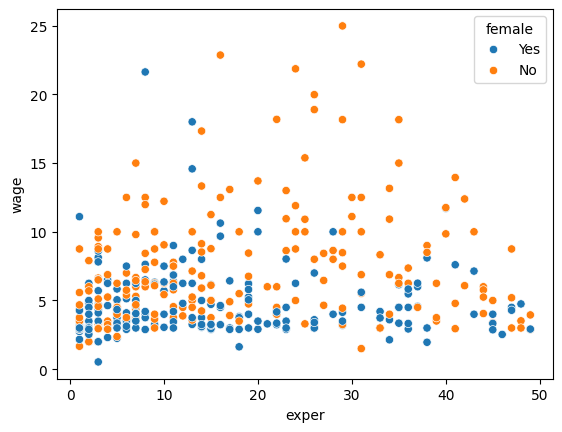

In [6]:
import matplotlib.pyplot as plt

sns.scatterplot(data=train_dataset, x='exper', y='wage', hue='female')

plt.show()

In [7]:
train_dataset['female'] = train_dataset['female'].map({'Yes': 1, 'No': 0})
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,1,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,1,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,0,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,0,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,0,Yes,1,Western Region,Other,Other


In [8]:
from sklearn.model_selection import train_test_split

In [ ]:
X_dt, y_dt = train_dataset[['educ', 'exper', 'female']], train_dataset['wage']
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(



    X_dt, y_dt, test_size=0.2, random_state=42



)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_dt_train, y_dt_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [12]:
y_pred_dt = model.predict(X_dt_test)

In [13]:
train_dataset.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region', 'work_industry', 'occupation'],
      dtype='object')

In [14]:
# Přidání původního datasetu s genderem a platem do jednoho DataFrame pro graf
comparison_df = X_dt_test.copy()
comparison_df['Actual Salary'] = y_dt_test
comparison_df['Predicted Salary'] = model.predict(X_dt_test)

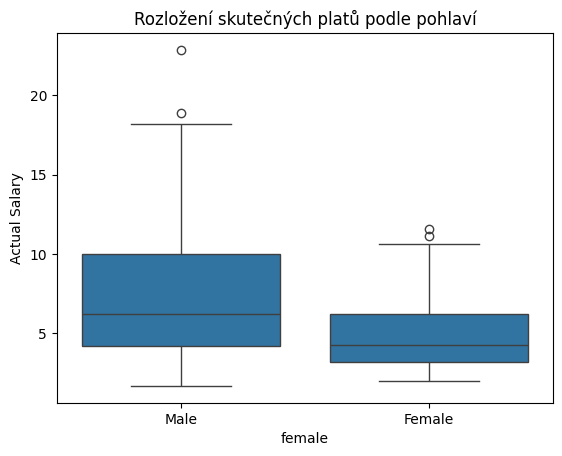

In [15]:
# Box plot skutečných platů podle pohlaví
import matplotlib.pyplot as plt

sns.boxplot(x='female', y='Actual Salary', data=comparison_df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Rozložení skutečných platů podle pohlaví")
plt.show()

In [16]:
import pandas as pd

x_dt_test = pd.read_csv('C:/Users/LOLSCROL/Datasets/x_test.csv')

In [17]:
x_dt_test.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,No,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,No,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,No,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,Yes,Yes,0,Other,Other,Other
4,14,33,3,No,Yes,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [18]:
x_dt_test['female'] = x_dt_test['female'].map({'Yes': 1, 'No': 0})
x_dt_test.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,0,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,0,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,0,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,1,Yes,0,Other,Other,Other
4,14,33,3,No,1,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [19]:
X_dt, y_dt = x_dt_test[['educ', 'exper', 'female']], train_dataset['wage']

In [20]:
x_dt_test.shape, train_dataset.shape

((105, 10), (421, 11))

In [21]:
y_pred_dec_tree = model.predict(X_dt)

In [22]:
y_pred_dec_tree

array([ 4.70367349,  6.49456526,  4.70367349,  3.37468754,  4.99490196,
        8.02000046,  3.37468754,  6.49456526, 10.26050001, 13.08818167,
        6.49456526, 13.08818167,  4.29945205,  6.49456526,  4.99490196,
       10.26050001,  6.49456526,  4.29945205,  6.49456526, 24.97999954,
        4.29945205,  4.99490196, 13.08818167, 10.26050001,  4.29945205,
       10.26050001,  6.49456526,  4.29945205,  4.70367349,  4.29945205,
        4.29945205,  4.29945205,  4.29945205, 10.26050001,  3.37468754,
       10.26050001, 10.26050001,  4.99490196,  6.49456526,  4.29945205,
        4.29945205,  3.37468754,  4.29945205,  5.30307695,  4.70367349,
        4.99490196,  6.49456526,  6.49456526,  5.30307695,  5.30307695,
        6.49456526,  4.29945205,  3.37468754,  4.29945205, 10.26050001,
        6.49456526,  6.49456526, 10.26050001,  4.29945205,  4.70367349,
        6.49456526,  6.49456526,  6.49456526,  4.29945205,  6.49456526,
        5.30307695,  3.37468754,  4.70367349,  4.29945205,  6.49

Polynomial features

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [26]:
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,1,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,1,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,0,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,0,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,0,Yes,1,Western Region,Other,Other


In [ ]:
X = train_dataset[['exper', 'female']]
y = train_dataset['wage']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly.get_feature_names_out()

pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

model = LinearRegression()

model.fit(X_poly, y)

y__train_pred = model.predict(X_poly)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MSE = mean_squared_error(y, y__train_pred)
MAE = mean_absolute_error(y, y__train_pred)
R2 = r2_score(y, y__train_pred)

print(f'MSE: {MSE}')
print(f'MAE: {MAE}')
print(f'R2: {R2}')

x_test = pd.read_csv('/content/drive/MyDrive/DataScience/Projekt_09_11_24/x_test.csv')
x_test.head()

x_test['female'] = x_test['female'].map({'Yes': 1, 'No': 0})
x_test.head()

X_test = x_test[['exper', 'female']]
X_test_poly = poly.transform(X_test)

poly.get_feature_names_out()

y_pred= model.predict(X_test_poly)


pd.DataFrame(y_pred).to_csv('y_pred_poly.csv', index=False)

plt.figure(figsize=(10, 6))

# Tréningové dáta: Skutočné vs. Predikované hodnoty
plt.scatter(X['exper'], y, color='blue', label="Skutočné hodnoty - Tréningové dáta", alpha=0.6)
plt.plot(X['exper'], y__train_pred, color='red', label="Predikované hodnoty - Tréningové dáta", linestyle='--')

# Testovacie dáta: Predikované hodnoty
plt.plot(X_test['exper'], y_pred, color='green', label="Predikované hodnoty - Testovacie dáta", linestyle=':')

# Popisky a legenda
plt.xlabel("Skúsenosti (Exper)")
plt.ylabel("Mzda (Wage)")
plt.title("Skutočné vs. Predikované hodnoty pre Tréningové a Testovacie dáta")
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Vytvorenie dvoch podgrafov pre tréningové a testovacie dáta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Tréningové dáta: Skutočné vs. Predikované hodnoty
ax1.scatter(X['exper'], y, color='blue', label='Skutočné hodnoty - Tréningové dáta', alpha=0.6)
ax1.scatter(X['exper'], y__train_pred, color='red', label='Predikované hodnoty - Tréningové dáta', marker='x', alpha=0.6)
ax1.set_xlabel("Skúsenosti (Exper)")
ax1.set_ylabel("Mzda (Wage)")
ax1.set_title("Skutočné vs. Predikované hodnoty pre Tréningové dáta")
ax1.legend()

# Testovacie dáta: Predikované hodnoty
ax2.scatter(X_test['exper'], y_pred, color='green', label='Predikované hodnoty - Testovacie dáta', marker='o', alpha=0.6)
ax2.set_xlabel("Skúsenosti (Exper)")
ax2.set_ylabel("Mzda (Wage)")
ax2.set_title("Predikované hodnoty pre Testovacie dáta")
ax2.legend()

# Zobrazenie grafu
plt.tight_layout()
plt.show()


# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 6))

# Tréningové dáta: Skutočné vs. Predikované hodnoty
plt.scatter(X['exper'], y, color='blue', label='Skutočné hodnoty - Tréningové dáta', alpha=0.6)
plt.scatter(X['exper'], y__train_pred, color='red', label='Predikované hodnoty - Tréningové dáta', marker='x', alpha=0.6)

# Testovacie dáta: Predikované hodnoty
plt.scatter(X_test['exper'], y_pred, color='green', label='Predikované hodnoty - Testovacie dáta', marker='o', alpha=0.6)

# Popisky a legenda
plt.xlabel("Skúsenosti (Exper)")
plt.ylabel("Mzda (Wage)")
plt.title("Skutočné vs. Predikované hodnoty pre Tréningové a Testovacie dáta")
plt.legend()

# Zobrazenie grafu
plt.show()

import pandas as pd
import seaborn as sns


# Vytvorenie dátového rámca s príznakmi pre každú skupinu
data = pd.DataFrame({
    'Hodnota': list(y) + list(y__train_pred) + list(y_pred),
    'Typ': (['Tréningové - Skutočné'] * len(y)) +
           (['Tréningové - Predikované'] * len(y__train_pred)) +
           (['Testovacie - Predikované'] * len(y_pred))
})

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Typ', y='Hodnota', data=data)
plt.xlabel("Dátový set")
plt.ylabel("Mzda (Wage)")
plt.title("Boxplot miezd pre Tréningové a Testovacie dáta (Skutočné vs. Predikované hodnoty)")
plt.show()